# Accident data Preprocessing

### The following sources have been used:

Accident data: https://data.gov.uk/dataset/road-accidents-safety-data

In [1]:
'''
RTA Accident file creation

'''
import pandas as pd
import glob
import os
import time

###print(os.getcwd())

start_time0 = time.time()

# file i/o
csv_loader ='Specs/Accidents_FLM.csv'
csv_in = 'Data/Accidents_2015.csv'
csv_out = 'Data/Accidents.csv'

#load field name mapper
pfl = pd.read_csv(csv_loader,low_memory=False)
pc_cols_rename = dict(pfl[['field_name','field_descriptor']].where(pfl['import']=='Y').dropna().values.tolist())
pc_cols_drop = pfl['field_name'].where(pfl['import']=='N').dropna().values.tolist()

#load Accident file
Accidents = pd.read_csv(csv_in, low_memory=False)

#clean up data
Accidents.drop(pc_cols_drop, axis=1, inplace=True)
Accidents.rename(columns=pc_cols_rename, inplace=True)
###postcodes.drop_duplicates()
###postcodes.info()

#save for later
try:
    Accidents.to_csv(csv_out, index=False)
except IOError as (errno, strerror):
    print 'I/O error({0}): {1}'.format(errno, strerror)
    if errno == 13:
        print '*** check to see if (someone has) file already open ***'
except:
    print "Unexpected error:", sys.exc_info()[0]
    raise
    
print "Accidents dataload: %s seconds " % (time.time() - start_time0)

Accidents dataload: 2.18299984932 seconds 


In [2]:
'''
RTA Accident load

'''
import pandas as pd
import os
import time

print(os.getcwd())

#Load Accident data
csv_in = 'Data/Accidents.csv'
Accidents = pd.read_csv(csv_in)


C:\GA\RTA


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140056 entries, 0 to 140055
Data columns (total 25 columns):
accident_index                                 140056 non-null object
location_easting_osgr                          140029 non-null float64
location_northing_osgr                         140029 non-null float64
longitude                                      140029 non-null float64
latitude                                       140029 non-null float64
police_force                                   140056 non-null int64
accident_severity                              140056 non-null int64
number_of_vehicles                             140056 non-null int64
number_of_casualties                           140056 non-null int64
date                                           140056 non-null object
day_of_week                                    140056 non-null int64
time                                           140038 non-null object
local_authority_(district)                     140

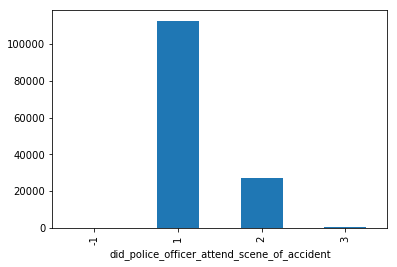

In [3]:
'''
RTA Accident check data

'''

import matplotlib.pyplot as plt
%matplotlib inline

# check data
print(Accidents.info())
col = 'did_police_officer_attend_scene_of_accident'
Accidents.groupby([col])[col].count().plot(kind='bar')
plt.show()

#print(Accidents.groupby([col])[col].count())

In [4]:
NE = 'National_grid_Easting'
NN = 'National_grid_Northing'
LA = 'latitude'
LO = 'longitude'
#where(postcodes[NE == 525130 and NN == 180050]))
#df[df['first_name'].notnull() & (df['nationality'] == "USA")]
#df['preTestScore'].where(df['postTestScore'] > 50)

#print(postcodes[['postcode',LA,LO,NE,NN]].where(postcodes[NN] == 180069).dropna())
#print(postcodes.loc(['postcode'])[(postcodes['postcode'] == ('W8  7EJ'))])

